## Overview

The challenge is based on the Kaggle Housing Prices Competition that provides a dataset with different house attributes together with the price label. The aim is to develop a model capable of predicting the house price based on the data available.

The following are some of the approaches which shall form the structure of this notebook:
#### 1. Exploratory Data Analysis

    1.1 Preliminary observations
    
    1.2 Exploring numerical attributes
    
    1.3 Exploring categorical attributes


#### 2. Data Cleaning & Preprocessing

    2.1 Dealing with missing/null values
    
    2.2 Addressing outliers
    
    2.3 Transforming data to reduce skew

3. Feature Selection & Engineering

4. Preliminary Assessment of Machine Learning Algorithms

5. Selection of Best Algorithm(s) and Fine-Tuning

6. Prediction

7. Kaggle Submission

## File Description

train.csv - the training set

test.csv - the test set

## About the Dataset

The dataset consists of 79 variables (columns) describing every aspect of residential homes in Ames, Iowa.

## Import libraries

Let's briefly import the necessary libaries that will be needed at this stage ofour analysis. We'll import more libraires as the need arises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Exploratory Data Analysis

The data is explored to:

1. Gain a preliminary understanding of available data
2. Check for missing or null values
3. Find potential outliers
4. Assess correlations amongst attributes/features
5. Check for data skew


In [2]:
# We preview our train and test datasets

train = pd.read_csv("train.csv", index_col='Id')


# Use the .head & .tail function to preview the first and last 5 rows of our dataset

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
# Let's look deeper in our data set with the .info function
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# Print a summary description of the dataset
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# print the shape to see how many number of rows and columns are in our dataset
train.shape

(1460, 80)

In [7]:
# Print the numerical columns withing the data
pd.DataFrame(train.select_dtypes(exclude=['object']).columns)

,0
0,MSSubClass
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,BsmtFinSF1
9,BsmtFinSF2


#### Categorical Columns

In [8]:
pd.DataFrame(train.select_dtypes(['object']).columns)

,0
0,MSZoning
1,Street
2,Alley
3,LotShape
4,LandContour
5,Utilities
6,LotConfig
7,LandSlope
8,Neighborhood
9,Condition1


### Observations

From the above, we can observe that:

* our dataset is made up of 80 variables (columns) with one as the target(SalePrice) variable making 79 columns that will be used for our prediction and 1460 rows or instances.
* A few columns contain null (empty) values
* Some potential anomalies in certain rows of the dataset may cause the column data type to become an 'object'. This may lead to an error in distinguishing between numerical and categorical columns. How can this be checked efficiently?
* Our dataset contains 37 numeric columns
* There are 43 categorical columns in our dataset

### 1.2 Exploring numerical columns 

#### How skewed is the target column?

It is a good practice to minimise the skew of the dataset when working with regression models. The reason often given is that skewed data adversely affects the prediction accuracy of regression models.
Note: While important for linear regression, correcting skew is not necessary for Decisions Trees and Random Forests.

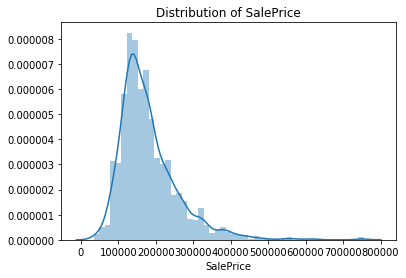

In [9]:
import seaborn as sns
target = train.SalePrice
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()

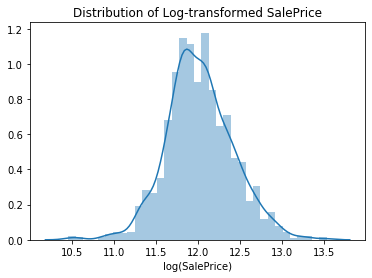

In [10]:
# plot for Log tranformed target
sns.distplot(np.log(target))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()


In [11]:
# Skew value before transformation
print("Before Log transformation", target.skew().round(decimals =2))

Before Log transformation 1.88


In [12]:
# Skew value after transformation
print("After Log transformation", np.log(target).skew().round(decimals =2))

After Log transformation 0.12


Correction Technique
-- Log transformation - This should be implemented during data preprocessing.

Also check for the rest of the numerical variables.

**Distribution of Attributes**

We take a look at the degree of skewness in the other numeric variables

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

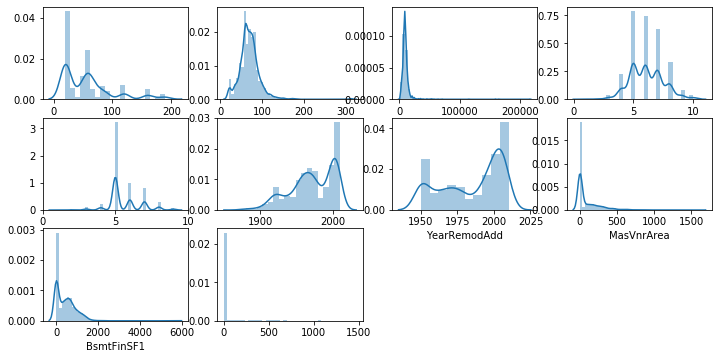

In [13]:
num_var = train.select_dtypes(exclude ='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_var.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_var.iloc[:,i].dropna())
    plt.xlabel(num_var.columns[i])

plt.tight_layout()
plt.show()

**Notes for Data Cleaning & Preprocessing:**

Uni-modal, skewed distributions could potentially be log transformed: 

```
LotFrontage, LotArea, 1stFlrSF, GrLivArea, OpenPorchSF
```



## 1.3 Finding Outliers

Data visualization plays an important role in finding outliers.


Within univariate analysis, 

Within bivariate analysis, 

The consensus is that all outliers should be carefully examined:


The scatterplots of SalePrice against each numerical attribute is shown below, with the aim of employing method 2 above with bivariate analysis.

**Univariate analysis - box plots for numerical attributes*

**Bivariate analysis - scatter plots for target versus numerical attributes**

In [ ]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_var.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_var.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

**Observations**

Based on a first viewing of the scatter plots against SalePrice, there appears to be:

* A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data
* BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
* 1stFlrSF (>4000)
* GrLivArea (>4000 AND SalePrice <300000)
* LowQualFinSF (>550)

**Correlation**

The linear correlation between two columns of data is shown below. There are various correlation calculation methods, but the Pearson correlation is often used and is the default method. It may be useful to note that:

    A combination of the correlation figure and a scatter plot can support the understanding of whether there is a non-linear correlation (i.e. depending on the data, this may result in a low value of linear correlation, but the variables may still be strongly correlated in a non-linear fashion)
    Correlation values may be heavily influenced by single outliers!

Several authors have suggested that "to use linear regression for modelling, it is necessary to remove correlated variables to improve your model", and "it's a good practice to remove correlated variables during feature selection"

Below is a heatmap of the correlation of the numerical columns:

In [ ]:
correlation = train.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

## Heatmap with annotation of correlation values
sns.heatmap(home_data.corr(), annot=True)

With reference to the target SalePrice, the top correlated attributes are:

In [ ]:
correlation['SalePrice'].sort_values(ascending=False).head(15)

Show scatter plots for each numerical attribute (again, but different, less-efficient code) and show correlation value:

In [ ]:
num_columns = train.select_dtypes(exclude='object').columns
corr_to_price = correlation['SalePrice']
n_cols = 5
n_rows = 8
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_columns):
            plt.scatter(train[num_columns[index]], train.SalePrice)
            plt.xlabel(num_columns[index])
            plt.title('Corr to SalePrice = '+ str(np.around(corr_to_price[index], decimals=3)))
plt.show()


**Observation**

Based on the scatter plots and correlation figures above, consider:

    Excluding GarageArea - highly (0.88) correlated with GarageCars, which has a higher corr with Price
    Excluding GarageYrBlt - highly (0.83) correlated with YearBuilt
    Excluding all attributes with low corr with Price and unclear non-linear correlation - e.g. MSSubClass, MoSold, YrSold, MiscVal, BsmtFinSF2, BsmtUnfSF, LowQualFinSF?



**Missing/null values in numerical columns**

In [ ]:
# Show columns with most null values:
num_var.isna().sum().sort_values(ascending=False).head()


**Observation**


Not yet clear what to do with LotFrontage missing values. Simple imputation with median? LotFrontage correlation with Neigborhood?
GarageYrBlt is highly correlated with YearBuilt, and as an after-note, it is discarded before the machine learning step. Hence no action required.
MasVnrArea has 8 missing values, the same number as missing MasVnrType values. Likely not to have masonry veneer. Hence, fill with 0


### 1.3 Categorical Variables

In [ ]:
cat_columns = train.select_dtypes(include='object').columns
print(cat_columns)


In [ ]:
## Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=train)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Box plot for KitchenQual column
var = train['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=train.SalePrice, x=var)
plt.show()

In [ ]:
train[cat_columns].isna().sum().sort_values(ascending=False).head(17)

**Observation**

For the moment, assume that PoolQC to Bsmt attributes are missing as the houses do not have them (pools, basements, etc.). Hence, the missing values could be filled in with "None".

MasVnrType has 8 missing values, the same number as missing MasVnrArea values. Likely not to have masonry veneer. Hence, fill with 'None'


## 2. Data Cleaning & Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

2.1 Dealing with missing/null values

In [ ]:
# Create a checkpoint of the dataset
train_copy = train.copy()


# Dealing with missing/null values 
# Numerical columns:
train_copy.MasVnrArea = train_copy.MasVnrArea.fillna(0)
# HOW TO TREAT LotFrontage - 259 missing values??


# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

for cat in cat_cols_fill_none:
    train_copy[cat] = train_copy[cat].fillna("None")

In [ ]:
# Check for outstanding missing/null values
# Scikit-learn's Imputer will be used to address these

train_copy.isna().sum().sort_values(ascending=False).head()



## 2.2 Addressing outliers

In [ ]:
# Remove outliers based on observations on scatter plots against SalePrice:
train_copy = train_copy.drop(train_copy['LotFrontage']
                                     [train_copy['LotFrontage']>200].index)
train_copy = train_copy.drop(train_copy['LotArea']
                                     [train_copy['LotArea']>100000].index)
train_copy = train_copy.drop(train_copy['BsmtFinSF1']
                                     [train_copy['BsmtFinSF1']>4000].index)
train_copy = train_copy.drop(train_copy['TotalBsmtSF']
                                     [train_copy['TotalBsmtSF']>6000].index)
train_copy = train_copy.drop(train_copy['1stFlrSF']
                                     [train_copy['1stFlrSF']>4000].index)
train_copy = train_copy.drop(train_copy.GrLivArea
                                     [(train_copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
train_copy = train_copy.drop(train_copy.LowQualFinSF
                                     [train_copy['LowQualFinSF']>550].index)


### 2.3 Transforming data to reduce skew

For the moment, this is restricted to the target variable.

In [ ]:
train_copy['SalePrice'] = np.log(train_copy['SalePrice'])
train_copy = train_copy.rename(columns={'SalePrice': 'SalePrice_log'})

### 3. Feature Selection & Engineering


**Considering highly-correlated features**

Feeding highly-correlated features to machine algorithms may cause a reduction in performance. Hence, these are addressed below:


In [ ]:
transformed_corr = train_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)


Highly-correlated attributes include (left attribute has higher correlation with SalePrice_log):

    GarageCars and GarageArea (0.882)
    YearBuilt and GarageYrBlt (0.826)
    GrLivArea_log1p and TotRmsAbvGrd (0.826)
    TotalBsmtSF and 1stFlrSF_log1p (0.780)

Perhaps choose to drop the column with the lower correlation against SalePrice_log from the above pairs with more than 0.8 correlation.


**Perform feature selection, and encoding of categorical columns**

In [ ]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attributes

X = train_copy.drop(attributes_drop, axis=1)

# Create target object and call it y
y = train_copy.SalePrice_log

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(X)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Normalisation - to be added later
# normaliser = StandardScaler()
# train_X = normaliser.fit_transform(train_X)
# val_X = normaliser.transform(val_X)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

### 4. Preliminary Assessment of Machine Learning Algorithms

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM',SVR()))

In [ ]:
Output = [] # to store the result from each fold
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, train_X,  train_y, cv=kfold, scoring='r2')
    Output.append(abs(cv_results))
    names.append(name)
    msg = '{}: {} {}'.format(name, abs(cv_results.mean()), abs(cv_results.std()))
    print(msg)  #print the performance of each of the model using the evaluation metrics


### 5. Selection of Best Algorithm(s) & Fine-Tuning

In [ ]:
'''
DecisionTreeRegressor have a better accuracy
we could try to fine tune it to yield a better accuracy 

'''
clf  = DecisionTreeRegressor(max_depth=10, random_state=100, criterion='mse')
clf.fit(train_X,train_y)
score = clf.score(train_X,train_y)
score

In [ ]:
result= clf.predict(val_X)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
result.shape

In [ ]:
train_y.shape

In [ ]:
mse = mean_squared_error(val_y, result)
mse


In [ ]:
mae =  median_absolute_error(val_y, result)
mae